# MNIST recognition

In this notebook we will be working with the MNIST numbers dataset, where training data consist of pictures of digits, and the target value is the digit itself.

First, we import the necessary libraries.

In [143]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

Now, we read both training and test dataset as arrays.

In [144]:
data = np.load('mnist.npz')
X_test_total, X_train_total, y_train_total, y_test_total = data['x_test'], data['x_train'], data['y_train'], data['y_test']

Let's select two digits that we will be learning to separate, for example 3 and 8.

In [145]:
num1, num2 = 3, 8

Let us form the lists of indices i such that the target of i-th object of our training data is either num1 or num2. Do the same for the test dataset.

In [146]:
train_indx = [y == num1 or y == num2 for y in y_train_total]
test_indx = [y == num1 or y == num2 for y in y_test_total]

Form new arrays consisting of the data with the target values num1 and num2 only.

In [147]:
X_train, y_train = X_train_total[train_indx], y_train_total[train_indx]
X_test, y_test = X_test_total[test_indx], y_test_total[test_indx]

## Looking at the data

Let us check the sizes of the datasets and the shape of one image.

In [148]:
print('Data shapes: ')
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

Data shapes: 
X_train:  (11982, 28, 28)
y_train:  (11982,)
X_test:  (1984, 28, 28)
y_test:  (1984,)


In [149]:
n_train = X_train.shape[0]
n_test = X_test.shape[0]

n_train, n_test

(11982, 1984)

In [150]:
print('Shape of one item: ')
print(X_train[0].shape)

Shape of one item: 
(28, 28)


Train data are images of digits.

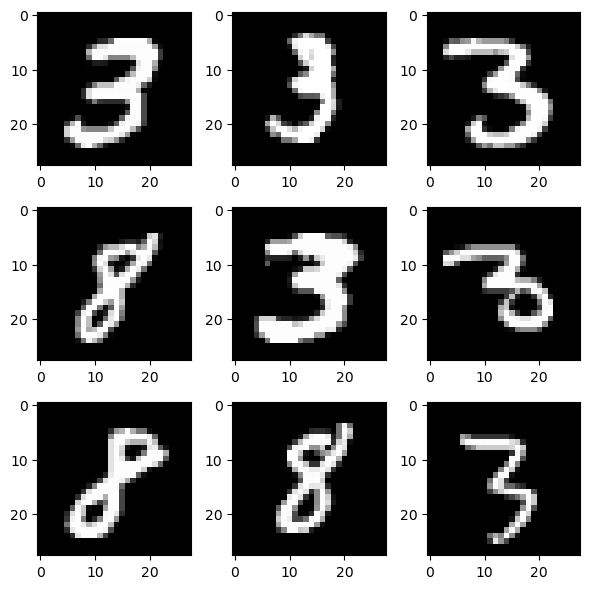

In [151]:
plt.figure(figsize=(6,6))
a, b = 3, 3
for i in range(a*b):
    plt.subplot(b, a, i+1)
    plt.imshow(X_train[i], cmap='gray')
plt.tight_layout()
plt.show()

Target values are numbers.

In [152]:
y_train[:19]

array([3, 3, 3, 8, 3, 3, 8, 8, 3, 8, 3, 3, 8, 3, 8, 3, 8, 8, 3],
      dtype=uint8)

## Task 1

### Task 1.1
Now our data is 3-dimensional of shape (number of images, n_pixels, n_pixels). To work with PCA and SVM we need to flatten the images by turning each of them into an array of shape (n_pixels x n_pixels, ).

In [153]:
def flatten_image(X):
    return np.ravel(X)

In [154]:
X_train_flat = np.array([flatten_image(img) for img in X_train])
X_test_flat = np.array([flatten_image(img) for img in X_test])
X_train_flat.shape, X_test_flat.shape

((11982, 784), (1984, 784))

PCA works best when the data is scaled (think, why?), so let's scale our data. We will use [StandartScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) for it. Note, that scaling replaces a collection of vectors x by the collection of the vectors $x' = (x-M)/D$, where $M$ is the mean vector of
the sample, $D$ is the vector of standard deviations of all components of the vectors, and the division is component-wise. So, the scaled collection has the same size as the original one, and each column has 0 mean and unit standard deviation.


In [155]:
scaler = StandardScaler()
X_train_flat = scaler.fit_transform(X_train_flat)
X_test_flat = scaler.transform(X_test_flat)

### Question 1.2

Please write your answer on the impact of scaling below. Why does scaling help PCA? If your idea need some computer experiments for confirmation (say, training and accuracy calculations  with non-scaled data), please provide the code here as well.

Scaling the data avoids problems in cases where objects with large values can have a big impact on the result, while objects with small values may not be taken into account enough. Without scaling, data with wider ranges of values may seem more significant, which will distort the results.

In [156]:
clf = LinearSVC(random_state=42)
X_train_flat_test = np.array([flatten_image(img) for img in X_train])
X_test_flat_test = np.array([flatten_image(img) for img in X_test])

clf.fit(X_train_flat_test, y_train)
y_pred_unscaled = clf.predict(X_test_flat_test)
accuracy_score_unscaled = accuracy_score(y_test, y_pred_unscaled)
print("Accuracy using unscaled data:", accuracy_score_unscaled)

X_train_scaled = scaler.fit_transform(X_train_flat_test)
X_test_scaled = scaler.transform(X_test_flat_test)
clf.fit(X_train_scaled, y_train)
y_pred_scaled = clf.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print("Accuracy using scaled data:", accuracy_scaled)

c:\Users\y2966\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


c:\Users\y2966\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy using unscaled data: 0.8744959677419355


c:\Users\y2966\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy using scaled data: 0.9581653225806451


c:\Users\y2966\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Now, we call PCA and reduce the number of components for each vector.

In [157]:
pca = PCA(n_components=128, random_state=42)
X_train_flat = pca.fit_transform(X_train_flat)

In [158]:
X_test_flat = pca.transform(X_test_flat)

In [159]:
X_train_flat.shape, X_test_flat.shape

((11982, 128), (1984, 128))

### Question 1.3

What is the ratio of the memory used for the data `compressed' by PCA and the one used for the original data?

The ratio of the amount of memory used for the data "compressed" by PCA and the amount of memory used for the source data is equal to 128/784 = 0.16

Now, we use SVM with linear kernel to separate the two classes.

In [160]:
%%time
clf = LinearSVC(random_state=42)
clf.fit(X_train_flat, y_train)

c:\Users\y2966\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


CPU times: total: 5.86 s
Wall time: 6.4 s


c:\Users\y2966\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

Now, let us make the predictions and calculate the accuracy, that is, the ratio of the true predictions to the test sample size.  Use [accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) as the quality metric here.

$$accuracy(y\_true, y\_pred) = \frac{1}{n}\sum_{i=1}^n [y\_true_i=y\_pred_i],$$ where $[a=b]=1$, if $a=b$, and $0$ otherwise.

In [161]:
y_pred = clf.predict(X_test_flat)
acc = accuracy_score(y_test, y_pred)
print("Test accuracy: ", acc)

Test accuracy:  0.9667338709677419


Let's try to make our own dataset. We can either make a photo image of an ink-written digit or draw a digit using a graphical editor of your computer or smartphone. Note that the input picture has to be a white number on a black background, like the numbers in the MNIST dataset. It can be either in png or jpeg format. Replace the sample striwith your file name.

In [162]:
from scipy import misc
from PIL import Image

In [163]:
image = Image.open('test_3-4.png').convert('L')
new_image = image.resize((28, 28))
custom = np.array(new_image)
custom.shape

(28, 28)

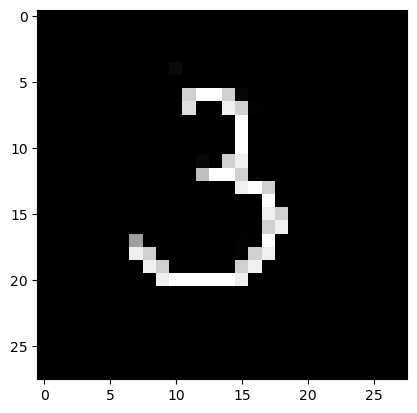

In [164]:
plt.imshow(custom, cmap='gray')
plt.show()

Re-shape your image and make a prediction.

In [165]:
custom = flatten_image(custom).reshape(1, -1)
custom = scaler.transform(custom)
custom = pca.transform(custom)
custom.shape

(1, 128)

In [166]:
clf.predict(custom)

array([3], dtype=uint8)

### Question 1.4

Repeat the above digit recognition procedure with other 5 to 10 hand-written images. Do your experiments confirm the above accuracy estimate? How do you think, why they confirm (or not confirm) it?

10 additional experiments were conducted with different numbers 3 and 8. In 9 out of 10 cases, the desired result was obtained, which approximately corresponds to the obtained accuracy of the model (96.67%). For a more accurate answer, several more series of experiments should be conducted.

The previously obtained model accuracy of 96.67% is, in my opinion, a fairly good result. Is it possible to get a higher accuracy? Yes! How do we get it? I think that accuracy can be increased by applying other approaches to building a model (but we haven't had a machine learning course yet, so I don't know what methods can be applied), and we can also increase the amount of data, but provided that they are high-quality and balanced.

The accuracy of 96.67% is quite enough for the task of converting handwritten text from a photo into one of the formats of text editors, but at the same time this accuracy won't be enough if we assume we want to make bank transfers from a handwritten statement of the account holder, where the transfer details are indicated in handwriting.


## Task 2
Now let's try another approach explained [here](https://technodocbox.com/3D_Graphics/77509408-Handwritten-digit-classification-and-reconstruction-of-marred-images-using-singular-value-decomposition.html) in Section 3. For each digit, we create a new matrix $A$ whose columns are flattened images of this digit. The first several (say, 10) columns of the matrix $U$ from SVD decomposition of $A$ represent a collection of "typical" images of this digit. Given an unrecognized flatten image, among average typical flattened images we find the closets one. Its target value is considered as a prediction for the target of the unrecognized image.

## SVD refesher
SVD of a matrix $A$ is a decomposition:
$A = U \Sigma V^T,$ where $U$ and $V$ are orthogonal matrices. In this method we will be utilizing some properties of SVD.

In [167]:
def getSingularVectorsLeft(matrix, number=10): # let's take first 10 numbers
    U, _, _ = svd(matrix)
    return U[:, :number]

In [168]:
def getSingularImage(X_train, y_train, number):
    # find images whose target is _number_
    indices = np.where(y_train == number)
    X_train = X_train[indices]
    A = np.array([flatten_image(img) for img in X_train]) # iteratively append new column to form matrix A
    left_basis = getSingularVectorsLeft(A.T) # get left singular vectors
    print('Iteration finished')
    return left_basis

Try it first on "0".

In [169]:
left_basis = getSingularImage(X_train_total, y_train_total, 0)

assert left_basis.shape, (784, 10)

Iteration finished


### Task 2.1
Plot first 9 singular images of the digit 0 taking columns of matrix U and reshaping them back into images 28x28.

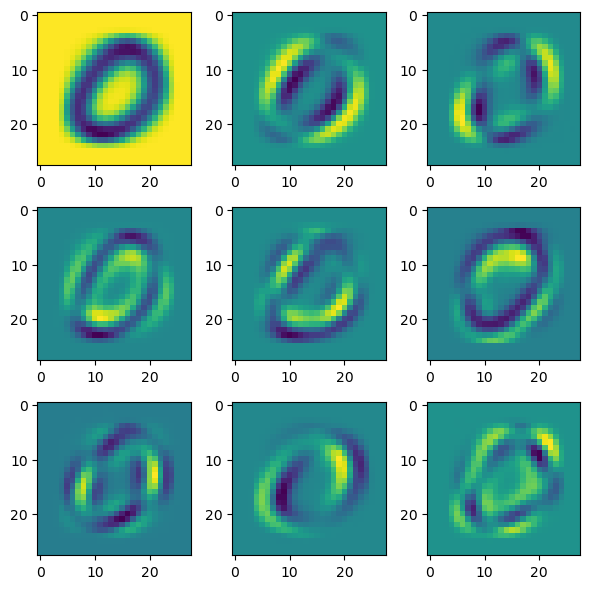

In [170]:
#singular images
plt.figure(figsize=(6,6))
a, b = 3, 3
for i in range(a*b):
    plt.subplot(b, a, i+1)
    img = left_basis[:, i].reshape(28, 28) # ith element of left basis reshaped back to 28x28
    plt.imshow(img, cmap='viridis')

plt.tight_layout()
plt.show()

### Question 2.2

Reflect on properties of the columns of $U_k$. What properties do you think are contained in each of them? Draw more singular images to help you make conclusions

Each column of the matrix In represents a vector. Matrix U is orthogonal, so each vector is orthogonal to all the others. When displaying a large number of vectors in the form of an image, we can see that the first images (columns of the matrix U) differ from each other much more strongly than the last ones. As a result of the above, it can be said that the columns of matrix U are responsible for the variability of data and contain information about the direction of the greatest variability, and the first columns contain more variability than the subsequent ones.

Now let's move on and obtain singular images for all numbers. The matrices $U_k$ from  [the article](https://technodocbox.com/3D_Graphics/77509408-Handwritten-digit-classification-and-reconstruction-of-marred-images-using-singular-value-decomposition.html) are represented as `number_basis_matrices[k]`.
This might take a while to finish, feel free to add debug print in your function to know the progress.

In [ ]:
number_basis_matrices = [getSingularImage(X_train_total, y_train_total, digit) for digit in range(0, 10)] 

Iteration finished
Iteration finished
Iteration finished
Iteration finished
Iteration finished
Iteration finished
Iteration finished
Iteration finished
Iteration finished
Iteration finished


### Task 2.3
Plot the first singular image of each digit, similarly to the previous task.

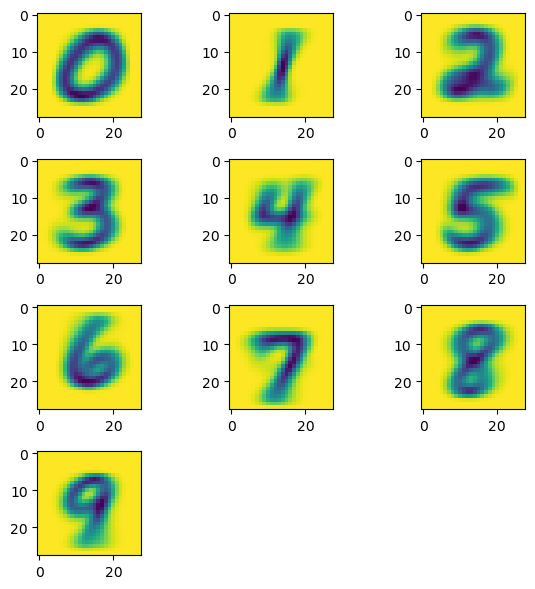

In [172]:
plt.figure(figsize=(6,6))
a, b = 3, 4
for i in range(10):
    plt.subplot(b, a, i+1)
    img = number_basis_matrices[i][:, 0].reshape(28, 28) # first column of U_k in number_basis_matrices[i] reshaped into 28x28 image
    plt.imshow(img, cmap='viridis')

plt.tight_layout()
plt.show()

In [173]:
dim = number_basis_matrices[0].shape[0]
print(dim)

784


### Task 2.4

Here we calculate the new projection matrix for each $U_k$ to apply later in testing:
$pr = (I - U_k \cdot U_{k}^{T})$. Use `numpy.matmul` for matrix multiplication and `numpy.identity` to create an identity matrix. Please note that this operation might also take some time to finish.

In [174]:
# create an array of pr for each number
numeric_values = [((np.identity(U.shape[0])) - np.matmul(U, U.T)) for U in number_basis_matrices]

### Task 2.5
Implement function utilizing `numeric_values` matrices to predict labels for unknown images. Use `numpy.norm` and enumerate to iterate over numeric values.

In [175]:
def find_closest(test_value, numeric_values):
    # find closest U_k to test_value using norm and return the target digit
    stacked_test = test_value.reshape(-1, 1)
    difference = [np.linalg.norm(U@stacked_test) for U in numeric_values]
    target = difference.index(min(difference))
    return target

In [176]:
# find array of predictions for test values and calculate accuracy in the cell below
y_pred = [find_closest(test_value, numeric_values) for test_value in X_test_total]

In [177]:
acc = accuracy_score(y_test_total, y_pred)
print(y_pred[:10])
print(y_test_total[:10])
print(acc)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]
[7 2 1 0 4 1 4 9 5 9]
0.9485


## Additional task
In the first task we trained Linear SVM to separate 3s and 8s. Here you can implement multiclass classification for _all_ numbers in `MNIST`. Use the same function LinearSVC for “one-vs-the-rest” multi-class strategy, see [the documentation](https://scikit-learn.org/stable/modules/svm.html#classification).  Follow the same steps from task 1: scaling, feature selection, training and testing. Is the accuracy of this method greater then the one calculated above?

**Note:** Use `random_state=42` for `PCA` and `LinearSVC`. Training `LinearSVC` on all the data might take a while, that's normal.

In [178]:
X_test_total, X_train_total, y_train_total, y_test_total = data['x_test'], data['x_train'], data['y_train'], data['y_test']

# flatten
X_train_flat2 = np.array([flatten_image(img) for img in X_train_total]) 
X_test_flat2 = np.array([flatten_image(img) for img in X_test_total]) 

# Scandart Scaler
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train_flat2)
X_test_scaled = scaler.transform(X_test_flat2)

# PCA
pca = PCA(n_components=128, random_state=42) 
X_train_flat2 = pca.fit_transform(X_train_scaled)
X_test_flat2 = pca.transform(X_test_scaled)

# LinearSVC
clf = LinearSVC(random_state=42)
clf.fit(X_train_flat2, y_train_total)

c:\Users\y2966\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\y2966\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [179]:
# calculate accuracy
acc = clf.score(X_test_flat2, y_test_total)
print(f"Accuracy on the test set: {accuracy}")

Accuracy on the test set: 0.9079


The **SVD** accuracy in analyzing the MNIST array was **94.85%**. The **LinearSVC** accuracy was **90.79%**. This means that a model trained with SVD is better in this case.

The accuracy of a particular model depends on many factors, such as:
- the quality of the data, the data must be clean and correct, it's like teaching a child profanity with a bunch of grammatical and logical errors, and then expect him to write you a 39 Shakespeare play.
- the balance of different data, that is, if we train our model to recognize handwritten digits, then the ratio of all digits to each other should be approximately the same. If, for example, we have 10,000 images of handwritten numbers and 9,000 of them are images of the number 1, then the results will be unsatisfactory.
- the amount of data (in most cases, the more data, the better, but only if the above conditions are met).

I think there are many other factors, but I have listed the main ones in my opinion.